PCA With SciKit

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Specify the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Outputs
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:\n", pca.components_)
print("Transformed Data:\n", X_pca)

Explained Variance Ratio: [0.96296464 0.03703536]
Principal Components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Transformed Data:
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]


PCA Without SciKit

In [3]:
import numpy as np

# Sample data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
X_std = X_centered / np.std(X_centered, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# Step 3: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select top k eigenvectors
k = 2  # Number of principal components
eigenvectors_k = eigenvectors[:, :k]

# Step 6: Transform the data
X_pca_manual = np.dot(X_std, eigenvectors_k)

# Outputs
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Transformed Data:\n", X_pca_manual)

Eigenvalues: [2.13992141 0.08230081]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Transformed Data:
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]


Performance comparison

In [4]:
import time
from sklearn.decomposition import PCA
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(10000, 50)  # 10,000 samples and 50 features

# Time Scikit-learn PCA
start_time = time.time()
pca = PCA(n_components=10)
X_pca_sklearn = pca.fit_transform(X)
sklearn_time = time.time() - start_time

# Time Manual PCA
start_time = time.time()
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_k = eigenvectors[:, sorted_indices[:10]]
X_pca_manual = np.dot(X_centered, eigenvectors_k)
manual_time = time.time() - start_time

print(f"Scikit-learn PCA Time: {sklearn_time:.4f} seconds")
print(f"Manual PCA Time: {manual_time:.4f} seconds")

Scikit-learn PCA Time: 0.0033 seconds
Manual PCA Time: 0.0058 seconds


Numerical Stability:

In [5]:
# Reconstruct data from principal components
X_reconstructed_sklearn = np.dot(X_pca_sklearn, pca.components_) + np.mean(X, axis=0)
X_reconstructed_manual = np.dot(X_pca_manual, eigenvectors_k.T) + X_mean

# Compute reconstruction error (e.g., Mean Squared Error)
from sklearn.metrics import mean_squared_error
print("Reconstruction Error (Scikit-learn):", mean_squared_error(X, X_reconstructed_sklearn))
print("Reconstruction Error (Manual):", mean_squared_error(X, X_reconstructed_manual))

Reconstruction Error (Scikit-learn): 0.06498103290324737
Reconstruction Error (Manual): 0.06498103290324737


Scalability and Memory Usage:

In [6]:
from memory_profiler import memory_usage

def run_sklearn_pca(X):
    pca = PCA(n_components=10)
    return pca.fit_transform(X)

def run_manual_pca(X):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_k = eigenvectors[:, sorted_indices[:10]]
    return np.dot(X_centered, eigenvectors_k)

# Compare memory usage
memory_sklearn = memory_usage((run_sklearn_pca, (X,)), max_iterations=1)
memory_manual = memory_usage((run_manual_pca, (X,)), max_iterations=1)

print("Memory Usage (Scikit-learn PCA):", memory_sklearn)
print("Memory Usage (Manual PCA):", memory_manual)

Memory Usage (Scikit-learn PCA): [153.0390625, 153.21875, 154.0234375]
Memory Usage (Manual PCA): [154.02734375, 154.0390625, 154.0390625]


Feature engineering flexibility:

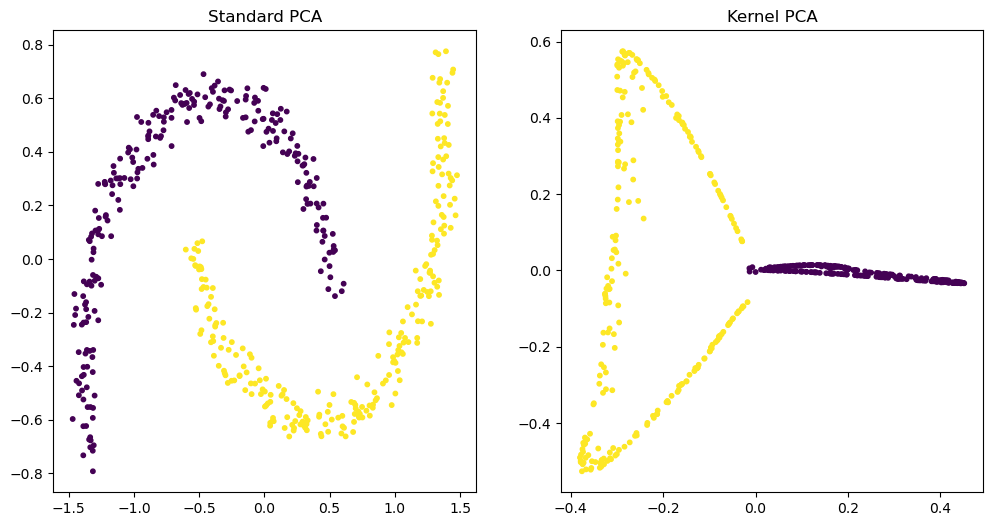

In [7]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Nonlinear dataset
X, y = make_moons(n_samples=500, noise=0.05)

# Standard PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title("Standard PCA")
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', s=10)
plt.title("Kernel PCA")
plt.show()

In [8]:
# Introduce missing values
X[0, 0] = np.nan

# Scikit-learn PCA
try:
    X_pca = pca.fit_transform(X)
except ValueError as e:
    print("Scikit-learn Error:", e)

# Manual PCA
try:
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
except Exception as e:
    print("Manual PCA Error:", e)


Scikit-learn Error: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
